# Topic 1 相关实验

Topic 1 实验中，会把相关的网络都在cifar10上进行测试

Files already downloaded and verified
Files already downloaded and verified
(32, 32, 3)


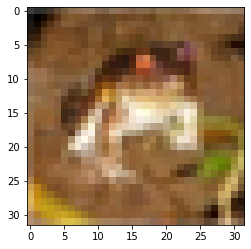

frog


In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision import transforms
import matplotlib.pyplot as plt
import time
import sys


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 8
num_epoch=20
lr=0.0001

transform_train = transforms.Compose([
    # you can add other transformations in this list
    # transforms.Resize([256, 256]),
    # transforms.RandomResizedCrop(32),  # 将给定图像随机裁剪为不同的大小和宽高比，然后缩放所裁剪得到的图像为制定的大小；
         # （即先随机采集，然后对裁剪得到的图像缩放为同一大小） 默认scale=(0.08, 1.0)
    transforms.RandomHorizontalFlip(), 
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    # you can add other transformations in this list
    # transforms.Resize([256, 256]),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225])
])
#Cifar10 dataset                    #选择数据的根目录   #选择训练集    #从网上下载图片
train_dataset = dsets.CIFAR10(root = './data', train= True, download= True, transform=transform_train)
                                    #选择数据的根目录   #选择训练集    #从网上下载图片
test_dataset = dsets.CIFAR10(root = './data', train= False, download= True, transform=transform_test)
#加载数据
#将数据打乱
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle= True,num_workers=0)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size,shuffle= True,num_workers=0)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#测试数据集加载情况
digit = train_loader.dataset.data[0]
print(digit.shape)
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print(classes[train_loader.dataset.targets[0]])


In [2]:
def evaluate_accuracy(data_iter, net, device=None):
    if device is None and isinstance(net, torch.nn.Module):
        # 如果没指定device就使用net的device
        device = list(net.parameters())[0].device
    acc_sum, n = 0.0, 0
    with torch.no_grad():
        for X, y in data_iter:
            net.eval() # 评估模式, 这会关闭dropout
            acc_sum += (net(X.to(device)).argmax(dim=1) == y.to(device)).float().sum().cpu().item()
            net.train() # 改回训练模式
            n += y.shape[0]
    return acc_sum / n

def train(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs):
    net = net.to(device)
    print("training on ", device)
    Loss_list = []
    Accuracy_train_list = []
    Accuracy_test_list = []


    loss = torch.nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, batch_count, start = 0.0, 0.0, 0, 0, time.time()
        for X, y in train_iter:
            X = X.to(device)
            y = y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.cpu().item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().cpu().item()
            n += y.shape[0]
            batch_count += 1
        test_acc = evaluate_accuracy(test_iter, net)
        Loss_list.append(train_l_sum / batch_count)
        Accuracy_train_list.append(100 *(train_acc_sum / n))
        Accuracy_test_list.append(100*test_acc)

        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, time %.1f sec'
              % (epoch + 1, train_l_sum / batch_count, train_acc_sum / n, test_acc, time.time() - start))
    x1 = range(0,num_epoch)
    
    plt.subplot(1,3,1)
    plt.plot(x1,Loss_list)
    plt.legend(['train_loss'])
    plt.subplot(1,3,2)
    plt.plot(x1,Accuracy_train_list)
    plt.legend(['train_acc'])
    plt.subplot(1,3,3)
    plt.plot(x1,Accuracy_test_list)
    plt.legend(['test_acc'])
    #plt.legend(['train_loss','train_acc','test_loss'])
    
    plt.show()




## 下面是VGG相关的实验，本次实验会考虑VGG11和VGG16

training on  cuda
epoch 1, loss 1.7192, train acc 0.328, test acc 0.459, time 108.9 sec
epoch 2, loss 1.2058, train acc 0.562, test acc 0.627, time 107.2 sec
epoch 3, loss 0.9733, train acc 0.655, test acc 0.665, time 99.0 sec
epoch 4, loss 0.8078, train acc 0.719, test acc 0.708, time 97.3 sec
epoch 5, loss 0.6714, train acc 0.768, test acc 0.714, time 97.7 sec
epoch 6, loss 0.5509, train acc 0.810, test acc 0.746, time 102.2 sec
epoch 7, loss 0.4390, train acc 0.850, test acc 0.744, time 98.7 sec
epoch 8, loss 0.3468, train acc 0.882, test acc 0.766, time 99.4 sec
epoch 9, loss 0.2809, train acc 0.906, test acc 0.755, time 97.9 sec
epoch 10, loss 0.2259, train acc 0.925, test acc 0.748, time 97.9 sec
epoch 11, loss 0.1890, train acc 0.936, test acc 0.743, time 98.1 sec
epoch 12, loss 0.1643, train acc 0.946, test acc 0.755, time 98.0 sec
epoch 13, loss 0.1415, train acc 0.954, test acc 0.761, time 98.0 sec
epoch 14, loss 0.1246, train acc 0.959, test acc 0.762, time 97.9 sec
epoch 15

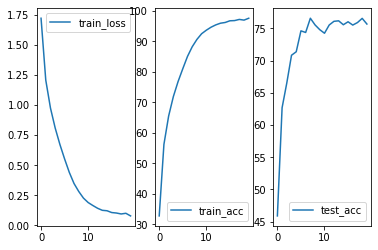

In [6]:
import VGG
from d2l import torch as d2l
VGG.vgg11
optimizer = torch.optim.Adam(VGG.vgg11.parameters(), lr=lr)

train(VGG.vgg11,train_loader,test_loader,batch_size,optimizer,device,num_epoch)

training on  cuda
epoch 1, loss 2.2456, train acc 0.125, test acc 0.225, time 138.0 sec
epoch 2, loss 1.8044, train acc 0.288, test acc 0.382, time 131.9 sec
epoch 3, loss 1.5233, train acc 0.434, test acc 0.489, time 135.0 sec
epoch 4, loss 1.2654, train acc 0.545, test acc 0.593, time 131.9 sec
epoch 5, loss 1.0562, train acc 0.626, test acc 0.651, time 131.6 sec
epoch 6, loss 0.8951, train acc 0.687, test acc 0.690, time 148.8 sec
epoch 7, loss 0.7663, train acc 0.736, test acc 0.714, time 137.7 sec
epoch 8, loss 0.6603, train acc 0.775, test acc 0.737, time 134.1 sec
epoch 9, loss 0.5737, train acc 0.808, test acc 0.761, time 132.3 sec
epoch 10, loss 0.4974, train acc 0.835, test acc 0.763, time 144.0 sec
epoch 11, loss 0.4235, train acc 0.858, test acc 0.773, time 140.8 sec
epoch 12, loss 0.3691, train acc 0.878, test acc 0.767, time 138.8 sec
epoch 13, loss 0.3132, train acc 0.898, test acc 0.786, time 145.0 sec
epoch 14, loss 0.2629, train acc 0.914, test acc 0.742, time 131.2 s

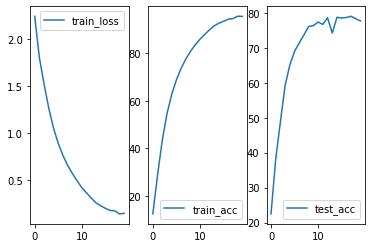

In [8]:
#d2l.train_ch6(VGG.vgg11, train_loader, test_loader, num_epoch, lr, d2l.try_gpu())
VGG.vgg16
optimizer = torch.optim.Adam(VGG.vgg16.parameters(), lr=lr)

train(VGG.vgg16,train_loader,test_loader,batch_size,optimizer,device,num_epoch)

## ResNet

training on  cuda
epoch 1, loss 1.7122, train acc 0.374, test acc 0.564, time 286.9 sec
epoch 2, loss 1.3410, train acc 0.525, test acc 0.672, time 280.5 sec
epoch 3, loss 1.1701, train acc 0.591, test acc 0.749, time 286.2 sec
epoch 4, loss 1.0710, train acc 0.628, test acc 0.762, time 288.4 sec
epoch 5, loss 0.9893, train acc 0.657, test acc 0.788, time 278.2 sec
epoch 6, loss 0.9415, train acc 0.675, test acc 0.797, time 280.8 sec
epoch 7, loss 0.9011, train acc 0.688, test acc 0.820, time 292.8 sec
epoch 8, loss 0.8569, train acc 0.704, test acc 0.823, time 293.9 sec
epoch 9, loss 0.8295, train acc 0.712, test acc 0.842, time 294.8 sec
epoch 10, loss 0.7949, train acc 0.727, test acc 0.840, time 296.1 sec
epoch 11, loss 0.7695, train acc 0.733, test acc 0.860, time 295.2 sec
epoch 12, loss 0.7448, train acc 0.745, test acc 0.863, time 296.2 sec
epoch 13, loss 0.7259, train acc 0.751, test acc 0.862, time 296.4 sec
epoch 14, loss 0.7026, train acc 0.759, test acc 0.869, time 297.1 s

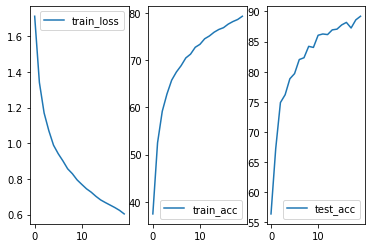

In [4]:
import ResNet

optimizer = torch.optim.Adam(ResNet.resnet18.parameters(), lr=lr)

train(ResNet.resnet18,train_loader,test_loader,batch_size,optimizer,device,num_epoch)

## GooLeNet

training on  cuda
epoch 1, loss 1.9395, train acc 0.212, test acc 0.266, time 182.0 sec
epoch 2, loss 1.6814, train acc 0.342, test acc 0.379, time 162.2 sec
epoch 3, loss 1.4907, train acc 0.437, test acc 0.465, time 165.7 sec
epoch 4, loss 1.3480, train acc 0.503, test acc 0.553, time 157.3 sec
epoch 5, loss 1.2294, train acc 0.556, test acc 0.593, time 158.5 sec
epoch 6, loss 1.1259, train acc 0.600, test acc 0.621, time 158.8 sec
epoch 7, loss 1.0464, train acc 0.629, test acc 0.638, time 156.7 sec
epoch 8, loss 0.9810, train acc 0.653, test acc 0.667, time 149.2 sec
epoch 9, loss 0.9285, train acc 0.676, test acc 0.691, time 150.4 sec
epoch 10, loss 0.8839, train acc 0.693, test acc 0.701, time 150.1 sec
epoch 11, loss 0.8446, train acc 0.705, test acc 0.718, time 149.8 sec
epoch 12, loss 0.8103, train acc 0.720, test acc 0.719, time 148.2 sec
epoch 13, loss 0.7782, train acc 0.732, test acc 0.718, time 147.7 sec
epoch 14, loss 0.7422, train acc 0.743, test acc 0.728, time 150.3 s

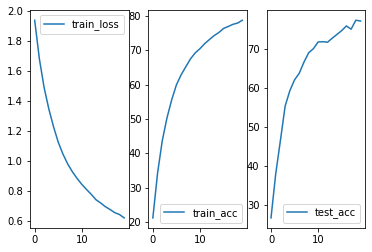

In [3]:
import GoogLeNet

optimizer = torch.optim.Adam(GoogLeNet.googlenet.parameters(), lr=lr)

train(GoogLeNet.googlenet,train_loader,test_loader,batch_size,optimizer,device,num_epoch)

## ResNeXt

d:\learn\Computer\Machine Vision\code\ResNeXt.py:80: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.classifier.weight)
d:\learn\Computer\Machine Vision\code\ResNeXt.py:85: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.state_dict()[key], mode='fan_out')


training on  cuda
epoch 1, loss 1.3819, train acc 0.511, test acc 0.643, time 716.2 sec
epoch 2, loss 0.8367, train acc 0.713, test acc 0.776, time 733.7 sec
epoch 3, loss 0.6430, train acc 0.782, test acc 0.809, time 727.0 sec
epoch 4, loss 0.5387, train acc 0.816, test acc 0.828, time 730.2 sec
epoch 5, loss 0.4625, train acc 0.843, test acc 0.838, time 739.7 sec
epoch 6, loss 0.4102, train acc 0.859, test acc 0.862, time 737.9 sec
epoch 7, loss 0.3698, train acc 0.874, test acc 0.878, time 738.9 sec
epoch 8, loss 0.3336, train acc 0.886, test acc 0.842, time 671.0 sec
epoch 9, loss 0.3029, train acc 0.895, test acc 0.889, time 685.3 sec
epoch 10, loss 0.2823, train acc 0.904, test acc 0.886, time 656.5 sec
epoch 11, loss 0.2565, train acc 0.913, test acc 0.879, time 637.0 sec
epoch 12, loss 0.2408, train acc 0.917, test acc 0.906, time 629.2 sec
epoch 13, loss 0.2173, train acc 0.925, test acc 0.890, time 636.4 sec
epoch 14, loss 0.2051, train acc 0.929, test acc 0.905, time 642.5 s

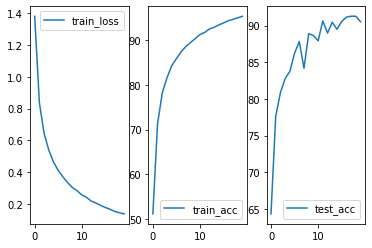

In [3]:
import ResNeXt

optimizer = torch.optim.Adam(ResNeXt.resnext.parameters(), lr=lr)

train(ResNeXt.resnext,train_loader,test_loader,batch_size,optimizer,device,num_epoch)